In [1]:
import time
import config
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

import pprint as pp
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print("Enter actor's full name...")
actor = input("... MUST be a string: ")
search = tmdb.Search()
actor_response = search.person(query=actor) 
actor_id = search.results[0]['id']
actor_id

Enter actor's full name...
... MUST be a string: Sean Penn


2228

In [3]:
actor_movie_credits = actor + " Movies"
actor_movie_credits

'Sean Penn Movies'

In [4]:
#Now get actor's credits
search_actor_id = tmdb.People(actor_id)
response_actor_id = search_actor_id.movie_credits()
response_actor_id
#actor_movie_credits = actor + " Credits")

{'cast': [{'character': 'Tobin Keller',
   'credit_id': '52fe4223c3a36847f8006e71',
   'poster_path': '/aAW4W8x41TwWQUQpLQqkWNQbtlv.jpg',
   'id': 179,
   'video': False,
   'vote_count': 737,
   'adult': False,
   'backdrop_path': '/4Iupq57fGTFOy2aysaMJLVRPoiE.jpg',
   'genre_ids': [80, 53],
   'original_language': 'en',
   'original_title': 'The Interpreter',
   'popularity': 11.835,
   'title': 'The Interpreter',
   'vote_average': 6.3,
   'overview': 'After Silvia Broome, an interpreter at United Nations headquarters, overhears plans of an assassination, an American Secret Service agent is sent to investigate.',
   'release_date': '2005-04-22'},
  {'character': 'Jimmy Markum',
   'credit_id': '52fe4238c3a36847f800d061',
   'release_date': '2003-10-08',
   'vote_count': 3233,
   'video': False,
   'adult': False,
   'vote_average': 7.7,
   'title': 'Mystic River',
   'genre_ids': [80, 18, 9648, 53],
   'original_language': 'en',
   'original_title': 'Mystic River',
   'popularity': 

In [5]:
num_of_credits = len(response_actor_id['cast'][:])
num_of_credits   #how many movies

110

In [5]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_actor_id['cast'][:]]
records = []
for film in (response_actor_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

actor_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
actor_df

,title,popularity,vote_average,vote_count
179,The Interpreter,11.835,6.3,737
322,Mystic River,10.697,7.7,3233
470,21 Grams,9.758,7.3,1650
687,Dead Man Walking,7.851,7.4,680
842,The Assassination of Richard Nixon,7.731,6.7,147
1282,Dogtown and Z-Boys,4.060,7.3,78
1662,State of Grace,6.041,7.0,132
1717,All the King's Men,6.241,5.9,151
10126,Colors,9.152,6.6,177
10139,Milk,8.580,7.3,1190


In [8]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in actor_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]    
    records.append(record)

actor_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
actor_movies_df    

Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
179,162944923,80000000,82944923,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."
322,156822020,25000000,131822020,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."
470,60427839,20000000,40427839,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
687,39363635,11000000,28363635,"[{'id': 18, 'name': 'Drama'}]"
842,3537961,0,3537961,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
1282,0,0,0,"[{'id': 99, 'name': 'Documentary'}]"
1662,0,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."
1717,9450897,55000000,-45549103,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
10126,46616067,6000000,40616067,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
10139,54586584,20000000,34586584,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na..."


In [9]:
print(actor_df.shape)
actor_df.head(5)

(75, 4)


,title,popularity,vote_average,vote_count
179,The Interpreter,11.835,6.3,737
322,Mystic River,10.697,7.7,3233
470,21 Grams,9.758,7.3,1650
687,Dead Man Walking,7.851,7.4,680
842,The Assassination of Richard Nixon,7.731,6.7,147


In [10]:
print(actor_movies_df.shape)
actor_movies_df.head(5)

(75, 4)


,revenue,budget,profit,genres
179,162944923,80000000,82944923,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."
322,156822020,25000000,131822020,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."
470,60427839,20000000,40427839,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
687,39363635,11000000,28363635,"[{'id': 18, 'name': 'Drama'}]"
842,3537961,0,3537961,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."


In [11]:
# This builds the full df, still need to build final
actor_full_df = pd.merge(actor_df, actor_movies_df, left_index=True, right_index=True)
print(actor_full_df.shape)
actor_full_df

(75, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
179,The Interpreter,11.835,6.3,737,162944923,80000000,82944923,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name..."
322,Mystic River,10.697,7.7,3233,156822020,25000000,131822020,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n..."
470,21 Grams,9.758,7.3,1650,60427839,20000000,40427839,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name..."
687,Dead Man Walking,7.851,7.4,680,39363635,11000000,28363635,"[{'id': 18, 'name': 'Drama'}]"
842,The Assassination of Richard Nixon,7.731,6.7,147,3537961,0,3537961,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
1282,Dogtown and Z-Boys,4.060,7.3,78,0,0,0,"[{'id': 99, 'name': 'Documentary'}]"
1662,State of Grace,6.041,7.0,132,0,0,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name..."
1717,All the King's Men,6.241,5.9,151,9450897,55000000,-45549103,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
10126,Colors,9.152,6.6,177,46616067,6000000,40616067,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
10139,Milk,8.580,7.3,1190,54586584,20000000,34586584,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na..."


In [12]:
#Save to PostgrSQL 

In [12]:
#Create new column containing a list of genres for each movie
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

actor_full_df['genre_names'] = actor_full_df['genres'].map(to_list)
#Drop duplicate info
actor_full_df.drop(['genres'], axis=1, inplace=True)
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
179,The Interpreter,11.835,6.3,737,162944923,80000000,82944923,"[Crime, Thriller]"
322,Mystic River,10.697,7.7,3233,156822020,25000000,131822020,"[Thriller, Crime, Drama, Mystery]"
470,21 Grams,9.758,7.3,1650,60427839,20000000,40427839,"[Drama, Crime, Thriller]"
687,Dead Man Walking,7.851,7.4,680,39363635,11000000,28363635,[Drama]
842,The Assassination of Richard Nixon,7.731,6.7,147,3537961,0,3537961,"[Drama, History, Thriller]"
1282,Dogtown and Z-Boys,4.060,7.3,78,0,0,0,[Documentary]
1662,State of Grace,6.041,7.0,132,0,0,0,"[Drama, Action, Thriller, Crime]"
1717,All the King's Men,6.241,5.9,151,9450897,55000000,-45549103,"[Drama, Thriller]"
10126,Colors,9.152,6.6,177,46616067,6000000,40616067,"[Action, Crime, Drama, Thriller, Romance]"
10139,Milk,8.580,7.3,1190,54586584,20000000,34586584,"[History, Drama]"


In [13]:
print(actor_full_df.shape)
actor_full_df.describe()

(75, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,75.000000,75.000000,75.0000,7.500000e+01,7.500000e+01,7.500000e+01
mean,5.456413,5.778667,450.8000,2.349103e+07,1.230667e+07,1.118436e+07
std,4.115058,2.302366,908.4853,5.545861e+07,2.043214e+07,4.130547e+07
min,0.600000,0.000000,0.0000,0.000000e+00,0.000000e+00,-4.554910e+07
25%,1.413500,5.550000,3.0000,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.058000,6.600000,47.0000,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.573500,7.100000,334.5000,1.615780e+07,2.000000e+07,5.026986e+06
max,13.745000,10.000000,5020.0000,3.497795e+08,9.000000e+07,2.767795e+08


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.

In [14]:
actor_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
179,The Interpreter,11.835,6.3,737,162944923,80000000,82944923,"[Crime, Thriller]"
322,Mystic River,10.697,7.7,3233,156822020,25000000,131822020,"[Thriller, Crime, Drama, Mystery]"
470,21 Grams,9.758,7.3,1650,60427839,20000000,40427839,"[Drama, Crime, Thriller]"


In [ ]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.
#hoffman_full_df.isnull().sum()


In [15]:
#Function removes Documentary(99) and TV Movie(10770) genres on each cell
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
            if g in cell:
                return False
    return True

#  .map to genres column
actor_full_df = actor_full_df[actor_full_df.genre_names.map(exclude_genres)]            
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
179,The Interpreter,11.835,6.3,737,162944923,80000000,82944923,"[Crime, Thriller]"
322,Mystic River,10.697,7.7,3233,156822020,25000000,131822020,"[Thriller, Crime, Drama, Mystery]"
470,21 Grams,9.758,7.3,1650,60427839,20000000,40427839,"[Drama, Crime, Thriller]"
687,Dead Man Walking,7.851,7.4,680,39363635,11000000,28363635,[Drama]
842,The Assassination of Richard Nixon,7.731,6.7,147,3537961,0,3537961,"[Drama, History, Thriller]"
1662,State of Grace,6.041,7.0,132,0,0,0,"[Drama, Action, Thriller, Crime]"
1717,All the King's Men,6.241,5.9,151,9450897,55000000,-45549103,"[Drama, Thriller]"
10126,Colors,9.152,6.6,177,46616067,6000000,40616067,"[Action, Crime, Drama, Thriller, Romance]"
10139,Milk,8.580,7.3,1190,54586584,20000000,34586584,"[History, Drama]"
10142,Casualties of War,7.313,7.1,350,18671317,22500000,-3828683,"[Drama, History, War]"


In [16]:
#Eliminate the rows without budget or revenue data
good_money_df = actor_full_df[(actor_full_df.budget > 0.0) & (actor_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
print(good_money_df.describe())
good_money_df

(27, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       27.00         27.00       27.00          27.00         27.00   
mean         9.59          6.80    1,184.48  64,465,701.78 31,203,703.70   
std          2.41          0.66    1,211.95  77,610,668.58 23,472,266.47   
min          5.28          5.40       28.00     109,130.00  4,500,000.00   
25%          7.95          6.40      270.50  12,717,635.50 15,000,000.00   
50%          9.62          7.00      680.00  36,516,012.00 22,500,000.00   
75%         11.66          7.35    1,723.50  95,334,491.50 45,000,000.00   
max         13.74          7.80    5,020.00 349,779,543.00 90,000,000.00   

              profit  
count          27.00  
mean   33,261,998.07  
std    63,232,349.11  
min   -45,549,103.00  
25%    -3,990,841.50  
50%    22,592,880.00  
75%    45,663,734.00  
max   276,779,543.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
179,The Interpreter,11.84,6.30,737,162944923,80000000,82944923,"[Crime, Thriller]"
322,Mystic River,10.70,7.70,3233,156822020,25000000,131822020,"[Thriller, Crime, Drama, Mystery]"
470,21 Grams,9.76,7.30,1650,60427839,20000000,40427839,"[Drama, Crime, Thriller]"
687,Dead Man Walking,7.85,7.40,680,39363635,11000000,28363635,[Drama]
1717,All the King's Men,6.24,5.90,151,9450897,55000000,-45549103,"[Drama, Thriller]"
10126,Colors,9.15,6.60,177,46616067,6000000,40616067,"[Action, Crime, Drama, Thriller, Romance]"
10139,Milk,8.58,7.30,1190,54586584,20000000,34586584,"[History, Drama]"
10142,Casualties of War,7.31,7.10,350,18671317,22500000,-3828683,"[Drama, History, War]"
10155,U Turn,9.87,6.60,319,6682098,19000000,-12317902,[Thriller]
2649,The Game,13.42,7.60,3057,109423648,50000000,59423648,"[Drama, Thriller, Mystery]"


In [25]:
print("Enter valid genre: ")
test_for_genre = input("... MUST be a capitalized: ")

def is_genre(cell):
    #returns True if in, else false (for masking)
    if test_for_genre in cell:
        return True 
    return False

tested_for_genre_df = good_money_df[good_money_df.genre_names.map(is_genre)]
not_tested_for_genre_df = good_money_df[False == good_money_df.genre_names.map(is_genre)]

print(tested_for_genre_df.shape)
print(tested_for_genre_df.describe())
tested_for_genre_df

Enter valid genre: 
... MUST be a capitalized: Thriller
(11, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       11.00         11.00       11.00          11.00         11.00   
mean         9.64          6.70    1,138.64  62,201,222.45 32,681,818.18   
std          2.31          0.64    1,262.95  61,786,099.88 24,454,317.34   
min          5.79          5.80       76.00     109,130.00  6,000,000.00   
25%          8.60          6.30      164.00   8,066,497.50 17,500,000.00   
50%          9.76          6.60      403.00  46,616,067.00 22,000,000.00   
75%         11.14          7.15    2,130.00 107,312,275.50 52,500,000.00   
max         13.42          7.70    3,233.00 162,944,923.00 80,000,000.00   

              profit  
count          11.00  
mean   29,519,404.27  
std    51,020,519.76  
min   -45,549,103.00  
25%    -8,235,451.00  
50%    40,427,839.00  
75%    52,312,275.50  
max   131,822,020.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
179,The Interpreter,11.84,6.30,737,162944923,80000000,82944923,"[Crime, Thriller]"
322,Mystic River,10.70,7.70,3233,156822020,25000000,131822020,"[Thriller, Crime, Drama, Mystery]"
470,21 Grams,9.76,7.30,1650,60427839,20000000,40427839,"[Drama, Crime, Thriller]"
1717,All the King's Men,6.24,5.90,151,9450897,55000000,-45549103,"[Drama, Thriller]"
10126,Colors,9.15,6.60,177,46616067,6000000,40616067,"[Action, Crime, Drama, Thriller, Romance]"
10155,U Turn,9.87,6.60,319,6682098,19000000,-12317902,[Thriller]
2649,The Game,13.42,7.60,3057,109423648,50000000,59423648,"[Drama, Thriller, Mystery]"
13526,The Weight of Water,5.79,5.80,76,109130,16000000,-15890870,"[Drama, Mystery, Thriller]"
13715,At Close Range,8.05,7.00,112,2347000,6500000,-4153000,"[Crime, Drama, Thriller]"
38363,Fair Game,9.62,6.60,403,24188922,22000000,2188922,"[Drama, Thriller]"


In [26]:
#Not in genre info
print(not_tested_for_genre_df.shape)
print(not_tested_for_genre_df.describe())
not_tested_for_genre_df.head(3)  

(16, 8)
       popularity  vote_average  vote_count        revenue        budget  \
count       16.00         16.00       16.00          16.00         16.00   
mean         9.55          6.88    1,216.00  66,022,531.31 30,187,500.00   
std          2.56          0.68    1,216.56  88,821,320.80 23,528,617.33   
min          5.28          5.40       28.00   6,045,657.00  4,500,000.00   
25%          7.78          6.57      533.75  17,414,560.75 13,750,000.00   
50%          9.40          7.05      883.50  36,186,032.50 23,750,000.00   
75%         11.81          7.40    1,602.75  64,141,274.00 34,000,000.00   
max         13.74          7.80    5,020.00 349,779,543.00 90,000,000.00   

              profit  
count          16.00  
mean   35,835,031.31  
std    71,956,301.49  
min   -26,355,708.00  
25%    -3,172,928.00  
50%    22,224,466.50  
75%    37,471,579.25  
max   276,779,543.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
687,Dead Man Walking,7.85,7.40,680,39363635,11000000,28363635,[Drama]
10139,Milk,8.58,7.30,1190,54586584,20000000,34586584,"[History, Drama]"
10142,Casualties of War,7.31,7.10,350,18671317,22500000,-3828683,"[Drama, History, War]"


In [27]:
len(tested_for_genre_df['popularity'])

11

[Text(0, 0, 'Thriller'), Text(0, 0, 'Not Thriller')]

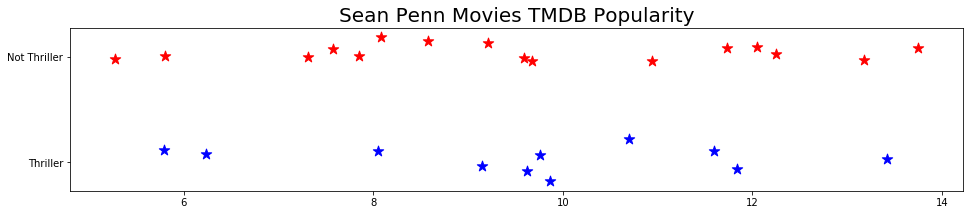

In [28]:
#Plot the distribution for popularity

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['popularity'], np.repeat(0, len(tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_tested_for_genre_df['popularity'], np.repeat(1, len(not_tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['popularity'])),marker="*", c='red', s=120)
plt.title(actor + ' Movies TMDB Popularity', size = 20)
ax.set_yticks([0, 1])

ax.set_yticklabels([test_for_genre, "Not " + test_for_genre])  #generalize the label for and genre
#plt.tight_layout()

Null Hypothesis: H0 - There is no difference in the popularity of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [29]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'])
genre_wins = count_winning_pairs(tested_for_genre_df['popularity'], not_tested_for_genre_df['popularity'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['profit'])*len(tested_for_genre_df['profit'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 176

Number of 'Not-in-Genre' Movie Wins: 84.0

Number of In Genre: Thriller Movie Wins: 92.0


The total number of wins is the total number of comparisons between a popularity of an "in genre" movie and the popularity of a not-in-genre movie.

In [30]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'], alternative="greater")
print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Thriller Movie Popularity: 0.588


*********************************

Here, we cannot reject the null hypothesis that Sean Penn's Thriller movies are more or less popularthan his thriller movies, at least in the measure of popularity in the TMDB.

*****Note that this conclusion will change for each actor and each genre tested!!!!

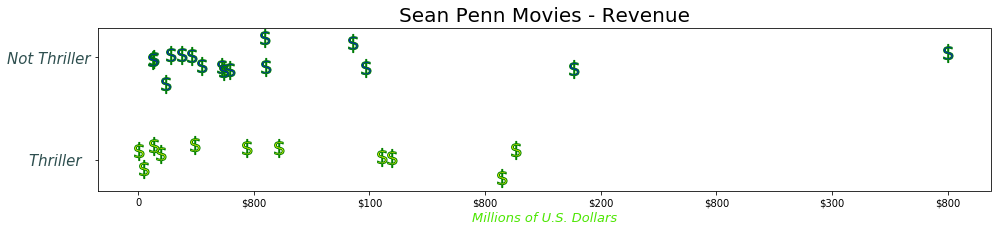

In [31]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['revenue'], np.repeat(0, len(tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_tested_for_genre_df['revenue'], np.repeat(1, len(not_tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title(actor + ' Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color=(.3, .9, .01), animated=True, fontstyle='italic', size=13)
ax.set_yticks([0, 1])
_nothing = ax.set_yticklabels([test_for_genre + "  ", "Not " + test_for_genre], fontstyle='oblique', color=(.18, .31, .31), size='15')
#plt.tight_layout()

******
Null Hypothesis: H0 - There is no difference in the revenue of Sean Penn's thriller movies in those movies not considerd thriller.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test
*******Note that this will change for each actor and genre tested.

In [32]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'])
genre_wins = count_winning_pairs(tested_for_genre_df['revenue'], not_tested_for_genre_df['revenue'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['revenue'])*len(tested_for_genre_df['revenue'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 176

Number of 'Not-in-Genre' Movie Wins: 88.0

Number of In Genre: Thriller Movie Wins: 88.0


Remember, the total number of "wins" is the total number of comparisons between the revenue of a in-genre movie and the revenue of a not-in-genre movie.

In [33]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Thriller Movie Popularity: 0.510


******
Once again, we cannot reject the null hypothesis that there is no defference in revenue between Sean OPenn's thriller and non-thriller movies.
*****Note that this conclusion willchange for each actor & genre tested.